In [331]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm 
import pylab as py 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import f1_score,roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [332]:
data = pd.read_csv('churn_prediction.csv')

In [333]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [334]:
data.shape

(28382, 21)

In [335]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

# Variable Identification and Typecasting

In [336]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [337]:
# changing to more appropriate categories
data['churn'] = data['churn'].astype('category')
data['dependents'] = data['dependents'].astype('Int64')
data['city'] = data['city'].astype('category')
data['dependents'] = data['dependents'].astype('float64')

In [338]:
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                              object
dependents                         float64
occupation                          object
city                              category
customer_nw_category                 int64
branch_code                          int64
days_since_last_transaction        float64
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
dtype: object

# Univariate Analysis

In [339]:
# checking for any missing values
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [340]:
data['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
9.0         1
52.0        1
36.0        1
50.0        1
8.0         1
25.0        1
32.0        1
Name: dependents, dtype: int64

In [341]:
data['dependents'] = data['dependents'].fillna(data['dependents'].mode()[0])
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
data['occupation'] = data['occupation'].fillna(data['occupation'].mode()[0])

In [342]:
data = data.drop('customer_id', 1)   
data = data.drop('days_since_last_transaction', 1) 
data = data.drop('city', 1)  

In [343]:
data.isnull().sum()

vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
customer_nw_category              0
branch_code                       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [344]:
# Function for printing descriptives

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))
    


In [345]:
Current = ['current_balance','current_month_credit','current_month_debit','current_month_balance']

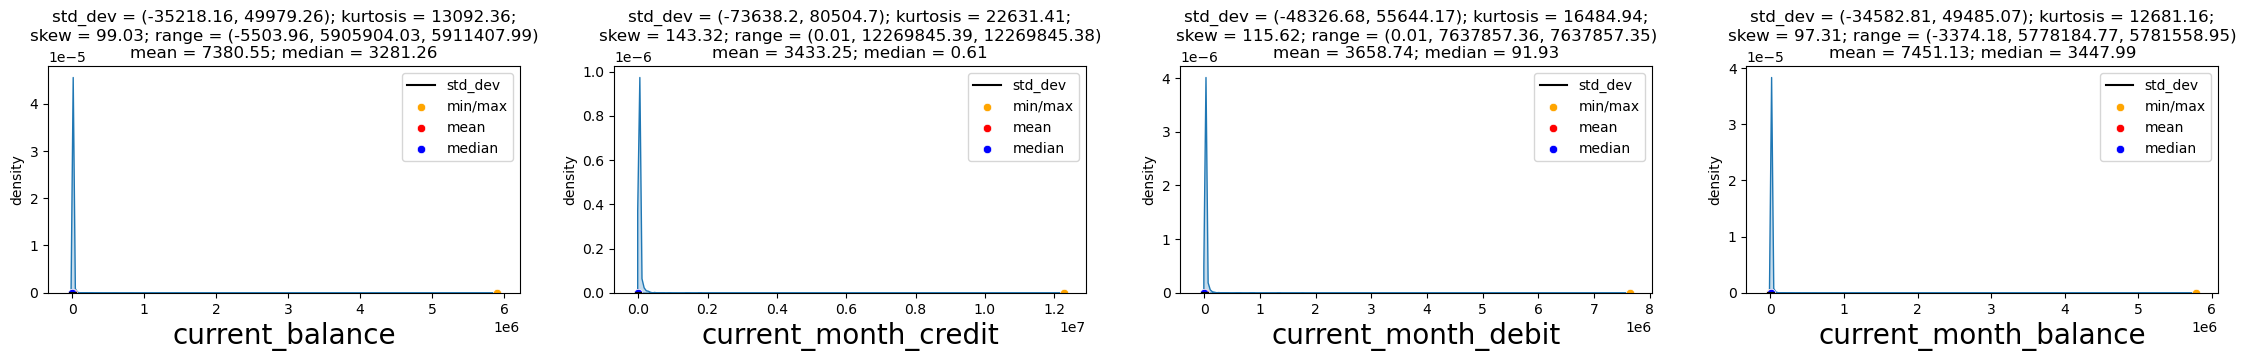

In [346]:
# Plots for variables with information about current month
UVA_numeric(data,Current)

In [347]:
# Using log transforms on all the data

data['current_balance'] = np.log(data['current_balance']+17000)
data['current_month_credit'] = np.log(data['current_month_credit'])
data['current_month_debit'] = np.log(data['current_month_debit'])
data['current_month_balance'] = np.log(data['current_month_balance']+17000)
Current = ['current_balance','current_month_credit','current_month_debit','current_month_balance']

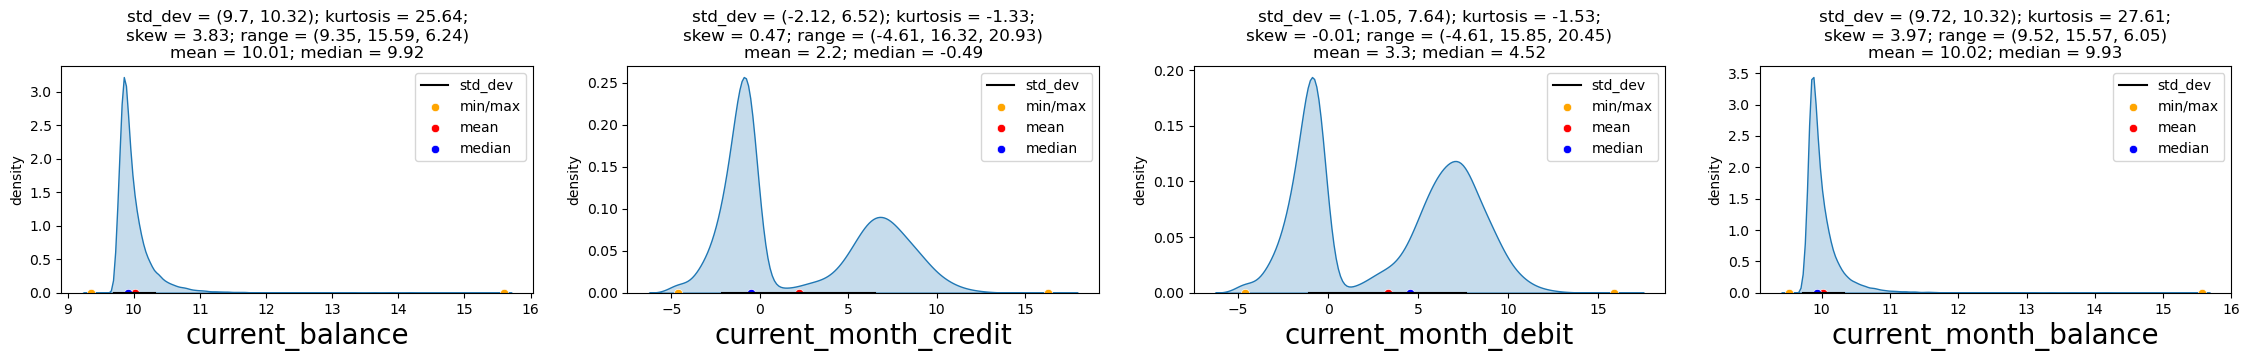

In [348]:
UVA_numeric(data,Current)

In [349]:
# Plots for variables with information about current month
Previous = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']

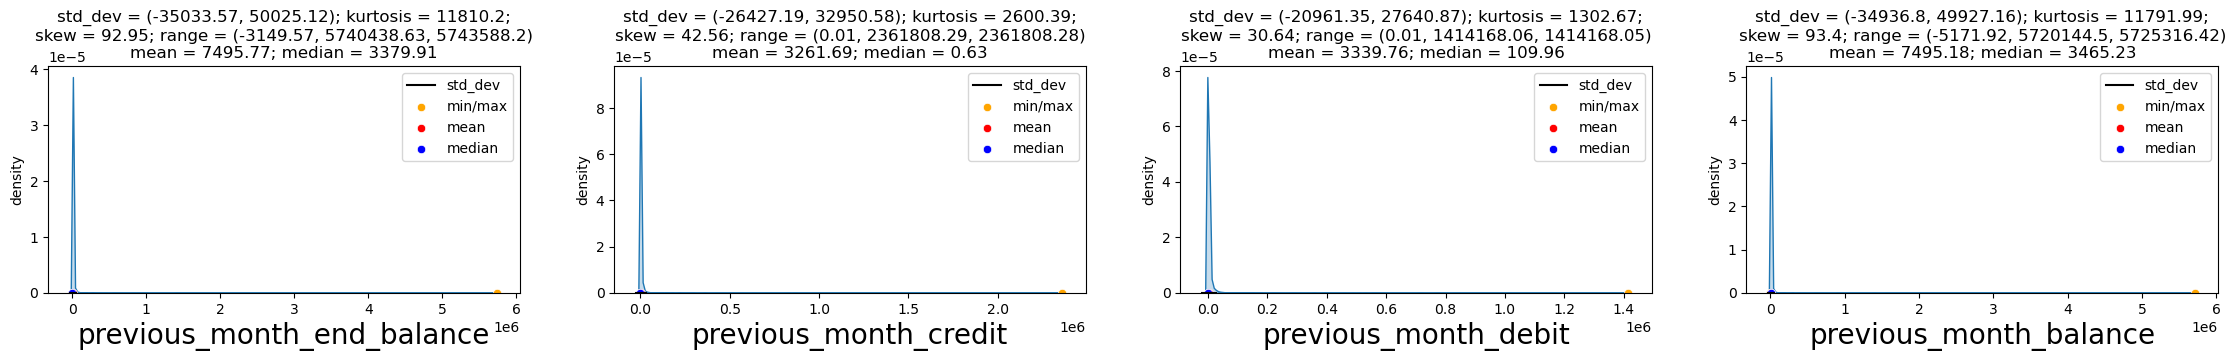

In [350]:
UVA_numeric(data,Previous)

In [351]:
# Using log transforms on all the data

data['previous_month_end_balance'] = np.log(data['previous_month_end_balance']+17000)
data['previous_month_credit'] = np.log(data['previous_month_credit'])
data['previous_month_debit'] = np.log(data['previous_month_debit'])
data['previous_month_balance'] = np.log(data['previous_month_balance']+17000)
Previous = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']

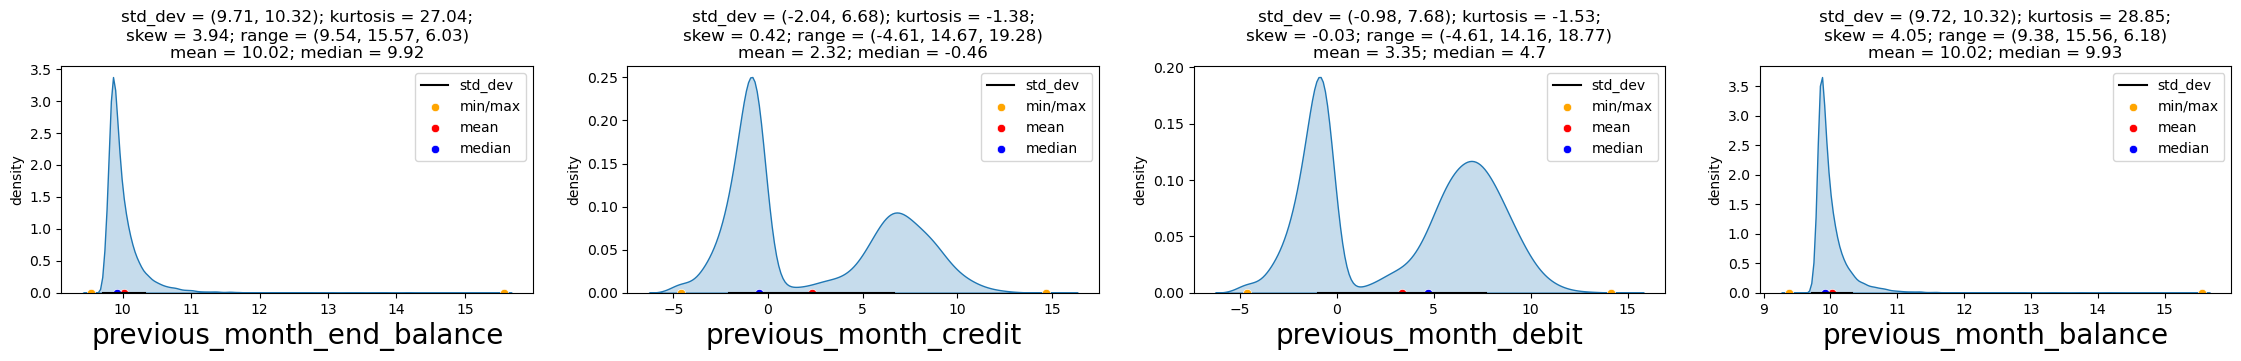

In [352]:
UVA_numeric(data,Previous)

* The previous and current month data has very similar distribution

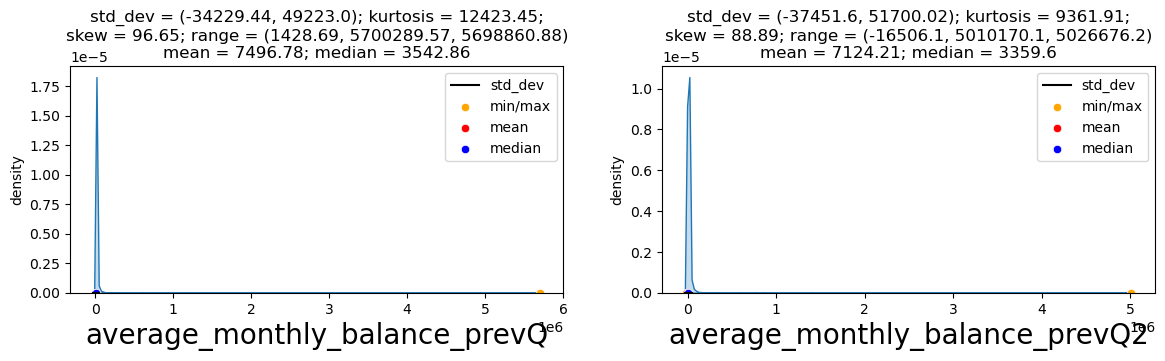

In [353]:
UVA_numeric(data,['average_monthly_balance_prevQ','average_monthly_balance_prevQ2'])

In [354]:
data['average_monthly_balance_prevQ'] = np.log(data['average_monthly_balance_prevQ']+17000)
data['average_monthly_balance_prevQ2'] = np.log(data['average_monthly_balance_prevQ2']+17000)

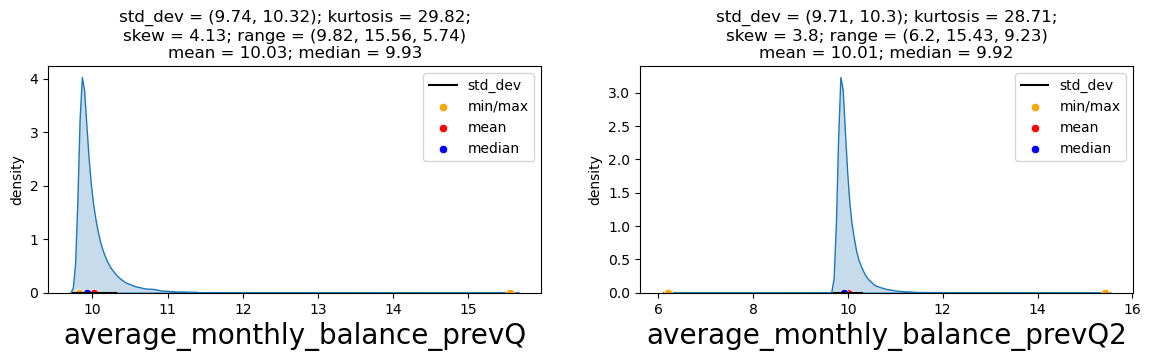

In [355]:
UVA_numeric(data,['average_monthly_balance_prevQ','average_monthly_balance_prevQ2'])

In [356]:
data.isnull().sum()     

vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
customer_nw_category              0
branch_code                       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

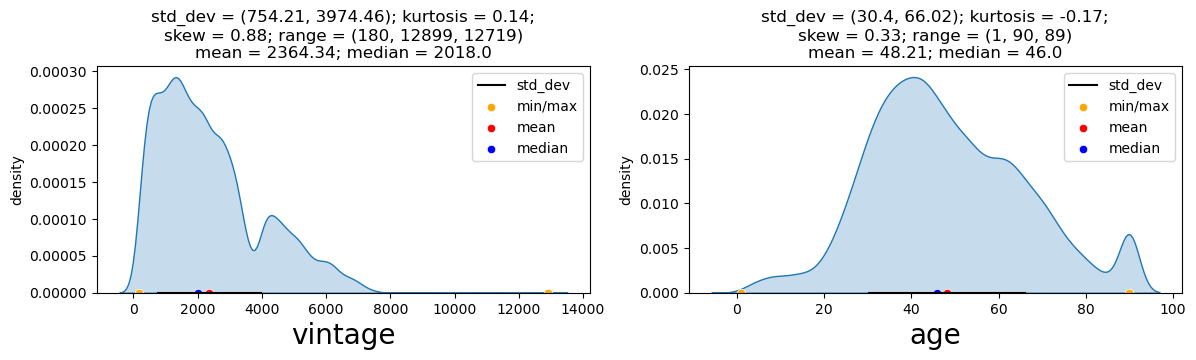

In [357]:
UVA_numeric(data,['vintage','age'])

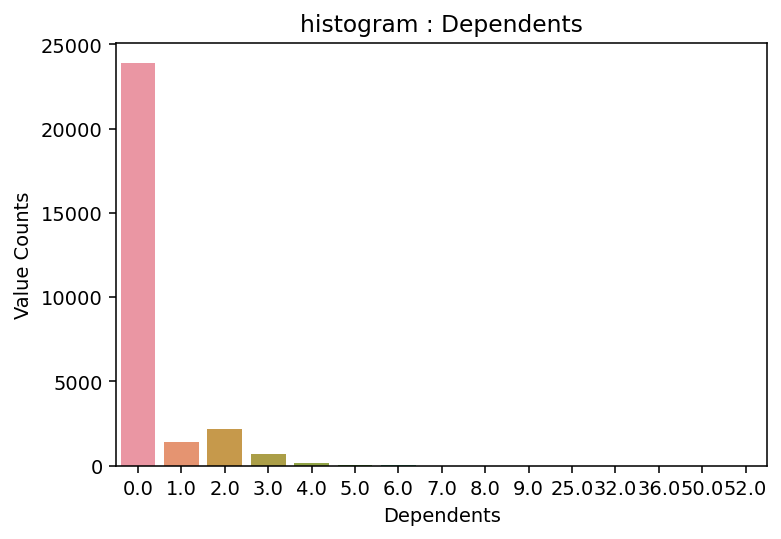

In [358]:
# plotting barplot for Dependents
plt.figure(dpi = 140)
sns.barplot(x=data['dependents'].value_counts().index, y=data['dependents'].value_counts().values)
plt.xlabel("Dependents")
plt.ylabel('Value Counts')
plt.title("histogram : Dependents")
plt.show()

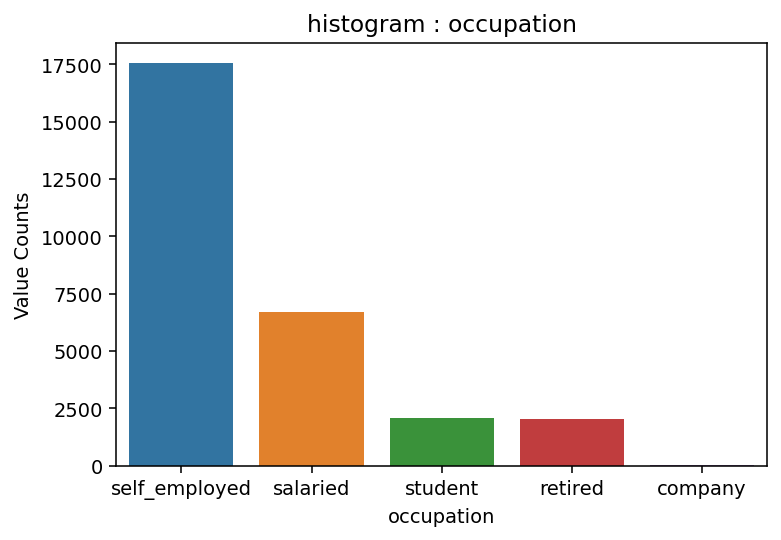

In [359]:
# plotting barplot for occupation
plt.figure(dpi = 140)
sns.barplot(x=data['occupation'].value_counts().index, y=data['occupation'].value_counts().values)
plt.xlabel("occupation")
plt.ylabel('Value Counts')
plt.title("histogram : occupation")
plt.show()

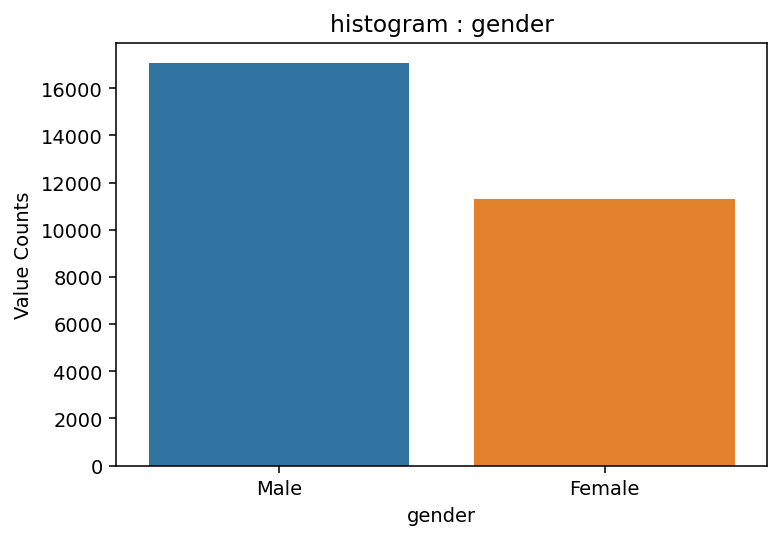

In [360]:
# plotting barplot for gender
plt.figure(dpi = 140)
sns.barplot(x=data['gender'].value_counts().index, y=data['gender'].value_counts().values)
plt.xlabel("gender")
plt.ylabel('Value Counts')
plt.title("histogram : gender")
plt.show()

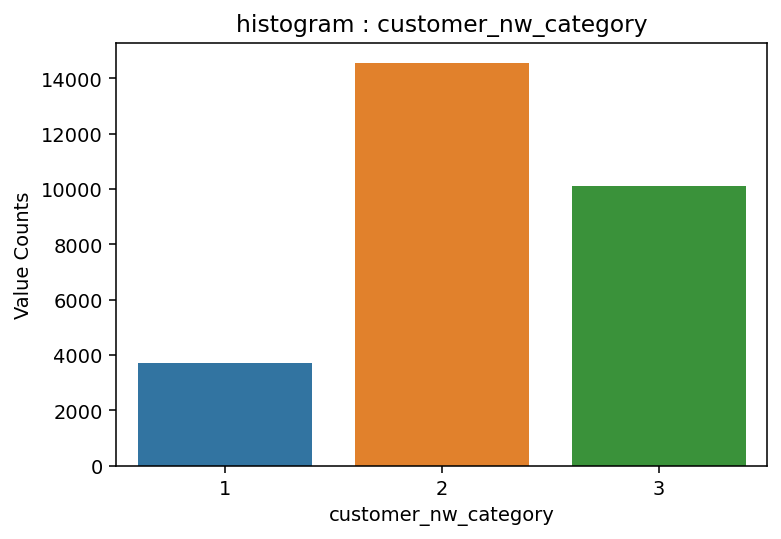

In [361]:
# plotting barplot for Customer net worth
plt.figure(dpi = 140)
sns.barplot(x=data['customer_nw_category'].value_counts().index, y=data['customer_nw_category'].value_counts().values)
plt.xlabel("customer_nw_category")
plt.ylabel('Value Counts')
plt.title("histogram : customer_nw_category")
plt.show()

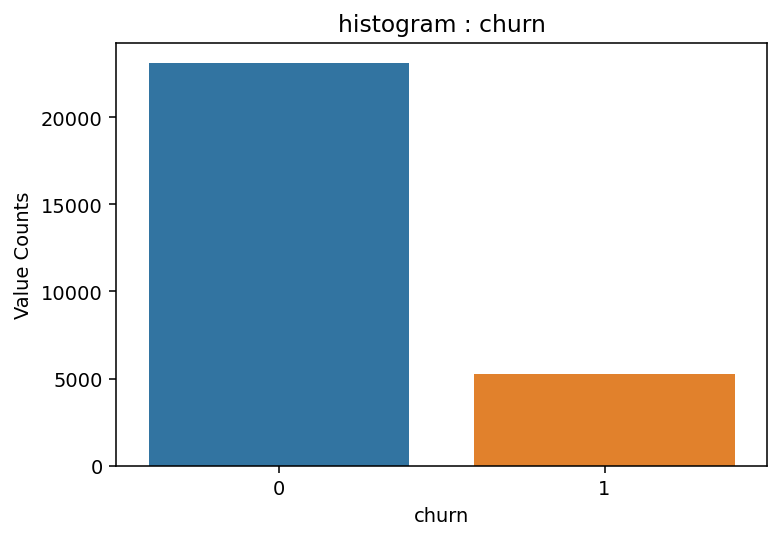

In [362]:
# plotting barplot for churn
plt.figure(dpi = 140)
sns.barplot(x=data['churn'].value_counts().index, y=data['churn'].value_counts().values)
plt.xlabel("churn")
plt.ylabel('Value Counts')
plt.title("histogram : churn")
plt.show()

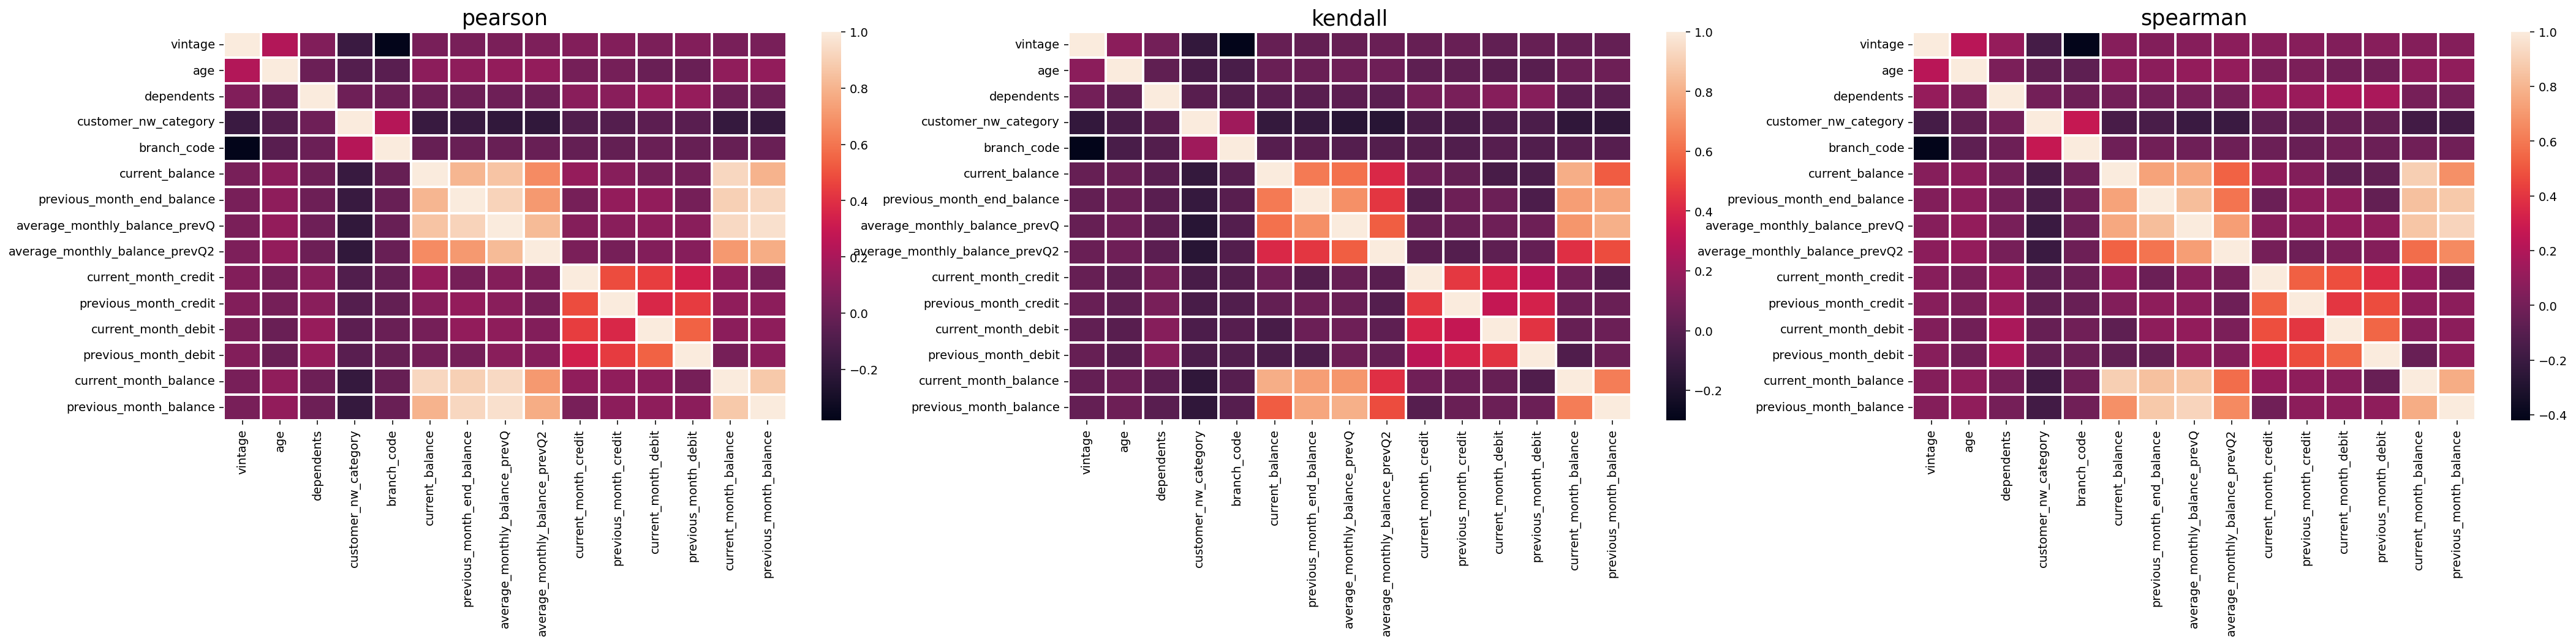

In [363]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]

# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

### Creating dummy variables

In [364]:
data = pd.get_dummies(data, columns=["gender","occupation"],drop_first=True)  

In [365]:
# Moving churn to the first column
data.insert(0, 'churn', data.pop('churn'))

In [366]:
# Response - Churn
data.head()

,churn,vintage,age,dependents,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,...,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,0,3135,66,0.0,2,755,9.823292,9.823292,9.823292,9.822769,...,-1.609438,-1.609438,-1.609438,9.823292,9.823292,1,0,0,1,0
1,0,310,35,0.0,2,3214,10.016386,10.154428,10.118569,10.289410,...,-0.579818,8.610004,4.610755,10.064619,10.157649,1,0,0,1,0
2,0,2356,31,0.0,2,41,9.948134,10.035186,9.994706,9.894242,...,-0.494296,8.707273,5.557716,9.999083,10.001981,1,0,1,0,0
3,1,478,90,0.0,2,582,9.867441,9.867441,9.856634,9.798490,...,-0.755023,-0.755023,7.670116,9.867441,9.834662,1,0,0,1,0
4,1,2531,42,2.0,3,388,9.794103,9.820199,9.833243,9.845388,...,6.571737,6.377781,7.338277,9.806820,9.835057,1,0,0,1,0


In [367]:
df = data

# Model

## Baseline Model (all predicted as churn - 0)

In [39]:
#seperating independent and dependent variables
x = data.drop(['churn'], axis=1)
y = data['churn']
x.shape, y.shape

((28382, 20), (28382,))

In [44]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 1,stratify = y)

In [56]:
pred_y = np.zeros(7096)

In [ ]:
# Import F1 score and recall score metrics

In [62]:
accuracy_score(test_y,pred_y)

0.814684329199549

In [63]:
recall_score(test_y,pred_y)

0.0

In [64]:
f1_score(test_y,pred_y)

0.0

## Logistic Regression

In [143]:
#seperating independent and dependent variables
x = data.drop(['churn'], axis=1)
y = data['churn']

In [144]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 1,stratify = y)

In [145]:
# Standard Scaling
std = StandardScaler()
x_scaled = std.fit_transform(train_x)
x = pd.DataFrame(x_scaled, columns = train_x.columns)

In [146]:
# Fitting logreg model

from sklearn.linear_model import LogisticRegression as LogReg

logreg = LogReg()

logreg.fit(train_x, train_y)

LogisticRegression()

In [147]:
# Transforming test X

x_test_scaled = std.transform(test_x)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = train_x.columns)

In [148]:
pred_y = logreg.predict(x_test_scaled)
pred_y

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [149]:
accuracy_score(test_y,pred_y)

0.5879368658399098

In [150]:
recall_score(test_y,pred_y)

0.7482889733840304

In [151]:
f1_score(test_y,pred_y)

0.40228945216680295

## KNN

In [157]:
#seperating independent and dependent variables
x = data.drop(['churn'], axis=1)
y = data['churn']

In [158]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 1,stratify = y)

In [159]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns = x.columns)

In [160]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [161]:
from sklearn.model_selection import cross_validate
scoring = ['recall', 'f1']
score = cross_validate( KNN(n_neighbors = 10) , X = train_x, y = train_y, cv = 10, scoring=scoring)
score

{'fit_time': array([0.00500035, 0.00650454, 0.00499821, 0.00600123, 0.00500107,
        0.00600171, 0.00600147, 0.00450397, 0.00500131, 0.00550485]),
 'score_time': array([0.6657455 , 0.66892552, 0.67189956, 0.68954539, 0.66903448,
        0.6235106 , 0.6358788 , 0.61286569, 0.63119364, 0.64188766]),
 'test_recall': array([0.01269036, 0.01012658, 0.01012658, 0.00506329, 0.        ,
        0.00759494, 0.00507614, 0.00253807, 0.00761421, 0.01015228]),
 'test_f1': array([0.02457002, 0.01946472, 0.01946472, 0.00990099, 0.        ,
        0.01485149, 0.00970874, 0.0049505 , 0.01470588, 0.01980198])}

In [165]:
def Val_score(n_neighbors):

  recall = []
  std_recall = []
  f1 = []
  std_f1 = []


  scoring = ['recall', 'f1']
    
  for i in n_neighbors:
    
    # 10 fold cross validation for every value of n_neighbor
    score = cross_validate( KNN(n_neighbors = i) , X = train_x, y = train_y, cv = 10, scoring=scoring)
    
    recall.append(score['test_recall'].mean())
    
    std_recall.append(score['test_recall'].std())
    
    f1.append(score['test_f1'].mean())
    
    std_f1.append(score['test_f1'].std())

    
    
    
  return recall, std_recall, f1, std_f1
    

In [172]:
n_neighbors = range(5,20)
recall, std_recall, f1, std_f1 = Val_score(n_neighbors)

Text(0.5, 1.0, 'Mean Validation score')

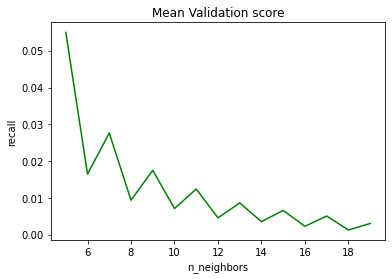

In [173]:
plt.plot(n_neighbors[:], recall[:], color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('recall')
plt.title('Mean Validation score')


Text(0.5, 1.0, 'Mean Validation score')

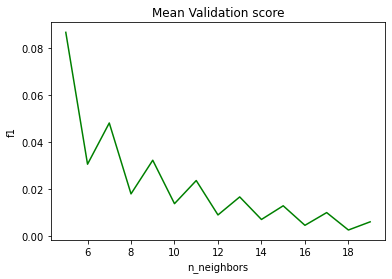

In [174]:
plt.plot(n_neighbors[:], f1[:], color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('f1')
plt.title('Mean Validation score')

## Decision Tree

In [238]:
#seperating independent and dependent variables
x = data.drop(['churn'], axis=1)
y = data['churn']

In [239]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 1,stratify = y)

In [240]:
# Creating Decision Tree model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=1)

In [241]:
# Parameters to tune for decision tree
param_dict = {
    "max_depth":range(3,25),
    "min_samples_split":range(100,2000),
    "min_samples_leaf":range(100,200)
}

In [242]:
from sklearn.model_selection import RandomizedSearchCV
randomsearch = RandomizedSearchCV(dt_model, param_distributions=param_dict,cv=10,verbose=1,n_jobs=-1,n_iter= 10)
randomsearch.fit(train_x, train_y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(3, 25),
                                        'min_samples_leaf': range(100, 200),
                                        'min_samples_split': range(100, 2000)},
                   verbose=1)

In [243]:
# Best paramters for decision tree
randomsearch.best_params_

{'min_samples_split': 148, 'min_samples_leaf': 101, 'max_depth': 18}

In [244]:
randomsearch.best_estimator_

DecisionTreeClassifier(max_depth=18, min_samples_leaf=101,
                       min_samples_split=148, random_state=1)

In [245]:
# Creating the best model

model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=197, min_samples_split=270,
                      random_state=1)

In [246]:
# Fitting training data on the best model

model.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=197,
                       min_samples_split=270, random_state=1)

#### Accuracy on train set

In [247]:
train_predict = model.predict(train_x)
accuracy_score(train_predict, train_y)

0.8572301042939021

In [248]:
train_predict = model.predict(train_x)
recall_score(train_predict, train_y)

0.7169540229885057

In [249]:
train_predict = model.predict(train_x)
f1_score(train_predict, train_y)

0.49627051218299345

#### Accuracy on test set

In [250]:
test_predict = model.predict(test_x)
accuracy_score(test_predict, test_y)

0.8582299887260428

In [251]:
test_predict = model.predict(test_x)
recall_score(test_predict, test_y)

0.7229437229437229

In [252]:
test_predict = model.predict(test_x)
f1_score(test_predict, test_y)

0.4990039840637451

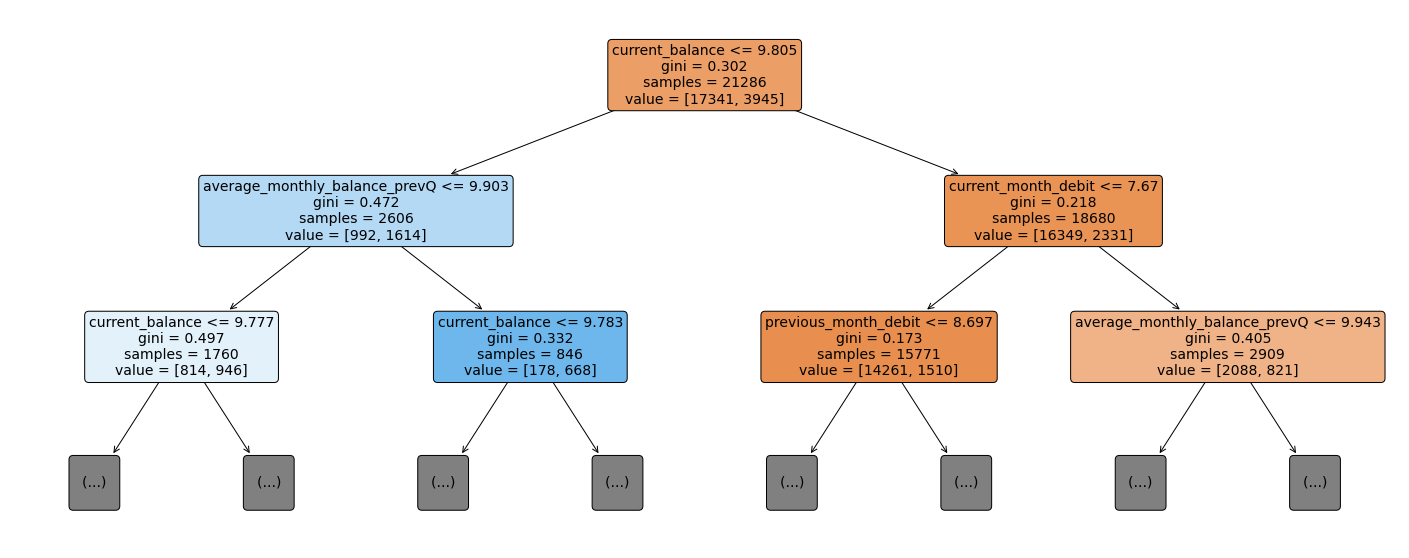

In [253]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))
a = plot_tree(model, 
              feature_names=train_x.columns,  
              max_depth = 2,
              filled=True, 
              rounded=True, 
              fontsize=14)

## Random Forest

In [254]:
#seperating independent and dependent variables
x = data.drop(['churn'], axis=1)
y = data['churn']

In [255]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 1,stratify = y)

In [256]:
#Importing random forest classifier 
from sklearn.ensemble import RandomForestClassifier

In [257]:
#creating a random forest instance
clf = RandomForestClassifier(random_state=0)

In [258]:
#train the model
clf.fit(train_x,train_y)

RandomForestClassifier(random_state=0)

### Accuracy on train set

In [259]:
train_predict = clf.predict(train_x)
accuracy_score(train_predict,train_y)

0.999953020764822

In [260]:
train_predict = clf.predict(train_x)
recall_score(train_predict,train_y)

1.0

In [261]:
train_predict = clf.predict(train_x)
f1_score(train_predict,train_y)

0.9998732412219546

### Accuracy on test set

In [262]:
test_predict = clf.predict(test_x)
accuracy_score(test_predict,test_y)

0.8656989853438557

In [263]:
test_predict = clf.predict(test_x)
recall_score(test_predict,test_y)

0.7362924281984334

In [264]:
test_predict = clf.predict(test_x)
f1_score(test_predict,test_y)

0.5420470927438732

## XGBoost

In [398]:
#seperating independent and dependent variables
x = data.drop(['churn'], axis=1)
y = data['churn']

In [399]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 1,stratify = y)

In [400]:
#Importing XGBM Classifier 
from xgboost import XGBClassifier

In [401]:
#creating an extreme Gradient boosting instance
clf = XGBClassifier(random_state=96)

In [402]:
train_x.head()

,vintage,age,dependents,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
8857,5555,71,0.0,2,279,10.117657,10.090228,10.162106,10.259868,8.873870,0.364643,7.957583,4.374120,10.156105,10.106352,1,0,0,1,0
1771,2636,56,0.0,1,569,10.248420,10.226168,10.231327,10.186797,-1.771957,-1.771957,-1.771957,-1.771957,10.241567,10.226168,0,0,0,1,0
11561,4218,63,0.0,3,249,9.909145,9.918279,9.873204,9.801766,7.214946,6.678845,7.343666,6.490526,9.871567,9.891703,1,0,1,0,0
16540,924,62,0.0,3,515,9.902255,9.905824,9.909187,9.898957,-2.659260,-2.659260,-2.659260,-2.659260,9.905701,9.909152,0,0,0,1,0
22337,901,38,0.0,3,1282,9.743122,9.743122,9.857828,10.152310,-1.771957,-1.771957,-1.771957,-1.771957,9.743122,9.743122,1,0,1,0,0


In [403]:
train_x.dtypes

vintage                             int64
age                                 int64
dependents                        float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
gender_Male                         uint8
occupation_retired                  uint8
occupation_salaried                 uint8
occupation_self_employed            uint8
occupation_student                  uint8
dtype: object

In [404]:
#training the model
clf.fit(train_x,train_y)

[12:59:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=96,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [405]:
#calculating score on training data
clf.score(train_x, train_y)

0.940524288264587

In [406]:
#calculating score on test data
clf.score(test_x, test_y)

0.8648534385569335

### Train set scores

In [407]:
train_predict = clf.predict(train_x)
accuracy_score(train_predict,train_y)

0.940524288264587

In [408]:
recall_score(train_predict,train_y)

0.9520755990550118

In [409]:
f1_score(train_predict,train_y)

0.8167342211928198

### Test set scores

In [410]:
test_predict = clf.predict(test_x)
accuracy_score(test_predict,test_y)

0.8648534385569335

In [411]:
recall_score(test_predict,test_y)

0.7004504504504504

In [412]:
f1_score(test_predict,test_y)

0.5646845211075806

### Hyperparamerter tuning for XGboost

In [452]:
# Parameters to tune for XGB
param_dict = {
    "max_depth":range(3,25),
    "sub_sample":[0.1,0.4,0.7,1],
    "colsample_bylevel":[0.1,0.4,0.7,1],
    "colsample_bytree":[0.1,0.4,0.7,1]
}

In [453]:
#creating an extreme Gradient boosting instance
clf = XGBClassifier(random_state=1)

In [454]:
from sklearn.model_selection import RandomizedSearchCV
randomsearch = RandomizedSearchCV(clf, param_distributions=param_dict,cv=5,verbose=1,n_jobs=-1,n_iter= 100)
randomsearch.fit(train_x, train_y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[13:28:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:28:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           num_parallel_tree=None,
                                           predictor=None, random_state=1,
                                       

In [455]:
# Best paramters for XGB
randomsearch.best_params_

{'sub_sample': 0.1,
 'max_depth': 3,
 'colsample_bytree': 0.7,
 'colsample_bylevel': 0.4}

In [456]:
randomsearch.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.4,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              predictor='auto', random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, sub_sample=0.1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [469]:
# Creating the best model

clf = XGBClassifier(random_state=1,max_depth=3,sub_sample=0.1,colsample_bytree=0.7,colsample_bylevel=0.4,n_estimators=500)

In [470]:
clf.fit(train_x, train_y)

[13:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.4,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=16, num_parallel_tree=1,
              predictor='auto', random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, sub_sample=0.1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [471]:
# Train set accuracy

train_predict = clf.predict(train_x)
print("accuracy_score",accuracy_score(train_predict,train_y))
print("recall_score",recall_score(train_predict,train_y))
print("f1_score",f1_score(train_predict,train_y))

accuracy_score 0.9182561307901907
recall_score 0.8972972972972973
f1_score 0.7410714285714286


In [472]:
# Test set accuracy

test_predict = clf.predict(test_x)
print("accuracy_score",accuracy_score(test_predict,test_y))
print("recall_score",recall_score(test_predict,test_y))
print("f1_score",f1_score(test_predict,test_y))

accuracy_score 0.8633032694475761
recall_score 0.7017543859649122
f1_score 0.5529953917050692
